## Wykrywanie twarzy na zdjęciach

In [203]:
import cv2
import sys
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

In [204]:
imagePath = 'images.jpg'
faceCascPath = 'haarcascade_frontalface_default.xml'

In [205]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier(faceCascPath)

In [206]:
# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [207]:
# Detect faces in the image
faces = ""
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
#     flags = cv2.CV_HAAR_SCALE_IMAGE
    flags = 0
)

In [208]:
print("Found {0} faces!".format(len(faces)))

Found 2 faces!


In [209]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

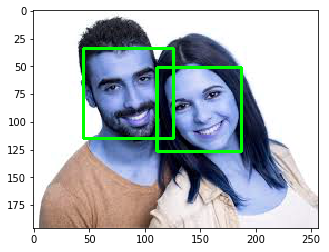

In [210]:
plt.imshow(image, cmap='gray')
plt.show()

## Wykrywanie poszczególnych elementów twarzy

In [211]:
imagePath = 'face.jpg'
eyeCascPath = 'eyecascade.xml'
mouthCascPath = 'Mouth.xml'
noseCascPath = 'nose.xml'

In [212]:
# Create the haar cascade
eyeCascade = cv2.CascadeClassifier(eyeCascPath)
mouthCascade = cv2.CascadeClassifier(mouthCascPath)
noseCascade = cv2.CascadeClassifier(noseCascPath)

In [213]:
# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [214]:
# Detect faces in the image
faces = ""
eyes = ""
noses = ""
noses = ""

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
#     flags = cv2.CV_HAAR_SCALE_IMAGE
    flags = 0
)
eyes = eyeCascade.detectMultiScale(gray, scaleFactor=1.9)
noses = noseCascade.detectMultiScale(gray, scaleFactor=2.5)
mouths = mouthCascade.detectMultiScale(gray,scaleFactor=5.5)

In [215]:
print("Found {0} faces!".format(len(faces)))
print("Found {0} eyes!".format(len(eyes)))
print("Found {0} noses!".format(len(noses)))
print("Found {0} mouths!".format(len(mouths)))

for (x, y, w, h) in eyes:
    cv2.rectangle(image,(x, y), (x+w, y+h), (255, 0, 0), 2)
for (x, y, w, h) in noses:
    cv2.rectangle(image,(x, y), (x+w, y+h), (255, 0, 255), 2)
for (x, y, w, h) in mouths:
    cv2.rectangle(image,(x, y), (x+w, y+h), (255, 255, 0), 2)

Found 1 faces!
Found 2 eyes!
Found 1 noses!
Found 1 mouths!


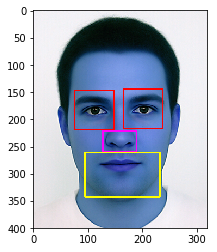

In [216]:
plt.imshow(image, cmap='gray')
plt.show()